In [3]:
# BiocManager::install("tidyverse")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Installing package(s) 'tidyverse'

also installing the dependencies ‘rematch’, ‘gargle’, ‘cellranger’, ‘ids’, ‘vroom’, ‘tzdb’, ‘selectr’, ‘broom’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rvest’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'FNN', 'gtools', 'randomForest'



In [1]:
# library(SingleCellExperiment)
# library(devtools)
library(TED)

Loading required package: snowfall

Loading required package: snow

Warning message:
“replacing previous import ‘gplots::lowess’ by ‘stats::lowess’ when loading ‘TED’”


In [21]:
#load in BP demo data in vignette
load("/home/cke/BPexample_gbm.rdata")

In [2]:
df_Puram<-read.table("/home/cke/Puram/HNSCC2PuramGSE103322_HNSCC_exp.tsv",sep='\t',header=TRUE)

In [3]:
df_Puram

X,HN28_P15_D06_S330_comb,HN28_P6_G05_S173_comb,HN26_P14_D11_S239_comb,HN26_P14_H05_S281_comb,HN26_P25_H09_S189_comb,HN26_P14_H06_S282_comb,HN25_P25_C04_S316_comb,HN26_P25_A11_S107_comb,HN26_P25_C09_S129_comb,⋯,HNSCC20_P3_B10_S22_comb,HNSCC20_P13_B11_S215_comb,HNSCC20_P3_C08_S32_comb,HNSCC17_P4_H03_S183_comb,HNSCC20_P3_F09_S69_comb,HNSCC17_P4_G12_S180_comb,HNSCC20_P13_C05_S221_comb,HNSCC17_P4_C12_S132_comb,HNSCC20_P3_H08_S92_comb,HNSCC20_P3_G06_S78_comb
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000121410,0.000000,0.00000,0.000000,0.000000,0.000000,0.066261,0.00000,0.54102,0.000000,⋯,0.63320,1.225900,1.37740,0.00000,0.000000,0.00000,0.00000,0.000000,2.99960,0.00000
ENSG00000268895,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,⋯,0.00000,1.064200,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
ENSG00000148584,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,⋯,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
ENSG00000175899,9.683000,7.58300,0.029983,6.054700,0.000000,0.000000,0.19661,7.70600,0.000000,⋯,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
ENSG00000245105,0.176320,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,⋯,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
ENSG00000166535,0.000000,0.00000,4.798800,0.000000,0.000000,2.283000,0.00000,0.00000,1.125000,⋯,0.31150,5.735100,0.00000,0.00000,0.000000,0.00000,0.00000,0.042644,0.00000,3.40600
ENSG00000256069,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,⋯,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
ENSG00000128274,2.248800,0.00000,0.000000,0.264240,0.000000,0.000000,0.00000,0.00000,0.000000,⋯,5.18090,3.655200,5.05750,0.00000,2.688900,0.00000,5.08770,1.811100,3.83700,4.34800
ENSG00000118017,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,⋯,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000


In [4]:
df_TCGA <- read.table("/home/cke/TCGA-HNSC.htseq_counts_exp2.tsv",sep='\t',header=TRUE)

In [5]:
df_TCGA

Ensembl_ID,TCGA.BB.4224.01A,TCGA.H7.7774.01A,TCGA.CV.6943.01A,TCGA.CN.5374.01A,TCGA.CQ.6227.01A,TCGA.CV.6959.01A,TCGA.F7.A61V.01A,TCGA.CV.7413.01A,TCGA.CV.7247.01A,⋯,TCGA.CV.6960.11A,TCGA.CV.A464.01A,TCGA.C9.A47Z.01A,TCGA.CN.6010.01A,TCGA.WA.A7GZ.11A,TCGA.CV.7235.01A,TCGA.CX.7086.01A,TCGA.CV.6935.11A,TCGA.P3.A6SW.01A,TCGA.HD.A6HZ.01A
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,2237,2740,2686,2086,10167,1154,1978,1930,1066,⋯,3340,929,1707,2218,2537,492,2741,8492,770,923
ENSG00000000005,2,0,0,1,9,6,1,1,1,⋯,0,2,0,0,41,0,0,3,1,0
ENSG00000000419,1606,1691,1649,2333,3021,2766,1762,1668,1760,⋯,1388,2332,1926,1574,1171,976,1952,1578,1569,1183
ENSG00000000457,1063,803,917,1288,537,527,482,671,600,⋯,608,472,410,852,557,376,1003,818,620,607
ENSG00000000460,1208,317,402,1105,459,747,331,476,874,⋯,206,386,210,729,127,363,1103,281,591,344
ENSG00000000938,256,330,1535,639,362,906,147,477,204,⋯,304,331,134,550,165,488,214,419,462,925
ENSG00000000971,177,5472,15358,5565,6963,12856,793,3669,2791,⋯,6363,7799,1264,5558,4651,5178,1809,7368,2082,2482
ENSG00000001036,2371,2316,3490,2065,4883,6120,2364,3366,1837,⋯,1242,3028,1356,2921,647,2138,2639,1355,1603,1769
ENSG00000001084,2741,8370,4671,2902,3140,7448,2827,2324,9779,⋯,2100,2494,3710,8749,3029,20007,13623,2276,31675,3949


In [6]:
df_TCGA_t<-t(df_TCGA)
colnames(df_TCGA_t)<-df_TCGA_t[1,]
df_TCGA_t <- df_TCGA_t[-1,]

In [7]:
df_TCGA_t

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,⋯,ENSGR0000263980,ENSGR0000264510,ENSGR0000264819,ENSGR0000265658,ENSGR0000270726,ENSGR0000275287,ENSGR0000276543,ENSGR0000277120,ENSGR0000280767,ENSGR0000281849
TCGA.BB.4224.01A,2237,2,1606,1063,1208,256,177,2371,2741,2515,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.H7.7774.01A,2740,0,1691,803,317,330,5472,2316,8370,816,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.CV.6943.01A,2686,0,1649,917,402,1535,15358,3490,4671,2080,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.CN.5374.01A,2086,1,2333,1288,1105,639,5565,2065,2902,1777,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.CQ.6227.01A,10167,9,3021,537,459,362,6963,4883,3140,2448,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.CV.6959.01A,1154,6,2766,527,747,906,12856,6120,7448,3527,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.F7.A61V.01A,1978,1,1762,482,331,147,793,2364,2827,1159,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.CV.7413.01A,1930,1,1668,671,476,477,3669,3366,2324,1459,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.CV.7247.01A,1066,1,1760,600,874,204,2791,1837,9779,1916,⋯,0,0,0,0,0,0,0,0,0,0
TCGA.CR.5249.01A,2538,0,1268,1066,950,924,5289,2584,2971,2572,⋯,0,0,0,0,0,0,0,0,0,0


In [8]:
df_Puram_t <- t(df_Puram)
colnames(df_Puram_t)<-df_Puram_t[1,]
df_Puram_t <- df_Puram_t[-1,]

In [9]:
df_Puram_t

,ENSG00000121410,ENSG00000268895,ENSG00000148584,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256069,ENSG00000128274,ENSG00000118017,ENSG00000265544,⋯,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549
HN28_P15_D06_S330_comb,0.0000000,0.0000000,0.0000000,9.6830000,0.1763200,0.0000000,0.0000000,2.2488000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.1216800,0.1635000,0.0908530,4.2748000,0.0000000,0.0000000
HN28_P6_G05_S173_comb,0.0000000,0.0000000,0.0000000,7.5830000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.1953500,0.2797700,3.9348000,0.0000000,3.7716000,0.0000000
HN26_P14_D11_S239_comb,0.0000000,0.0000000,0.0000000,0.0299830,0.0000000,4.7988000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0214800,0.0000000,0.0731350,0.0000000,1.3045000,2.1120000
HN26_P14_H05_S281_comb,0.0000000,0.0000000,0.0000000,6.0547000,0.0000000,0.0000000,0.0000000,0.2642400,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0894980,0.1865000,0.2141200,0.1243300,0.0935600,0.0000000
HN26_P25_H09_S189_comb,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,2.1385000,0.2289700,0.1335600,2.9059000,3.0034000,0.0000000,0.0000000
HN26_P14_H06_S282_comb,0.0662610,0.0000000,0.0000000,0.0000000,0.0000000,2.2830000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.8718400,0.0000000,0.0000000,0.0000000,1.2016000,0.0635030,0.0510240,0.6050200,0.0000000,0.0000000
HN25_P25_C04_S316_comb,0.0000000,0.0000000,0.0000000,0.1966100,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.3628900,1.0881000,0.8559900,0.0000000,0.8567900,0.0000000
HN26_P25_A11_S107_comb,0.5410200,0.0000000,0.0000000,7.7060000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,4.6348000,0.0000000,0.0000000,0.0000000,0.0976110,0.0676390,0.0000000,5.2928000,0.0000000,0.0000000
HN26_P25_C09_S129_comb,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.1250000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0621220,0.0328060,0.0922070,0.0000000,0.0172090,0.0000000
HNSCC26_P24_H05_S377_comb,1.3004000,0.0000000,0.0000000,0.0000000,2.6192000,0.1256500,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.6229300,0.2215700,0.4200800,0.5568000,0.0000000,0.0000000


In [28]:
# read in marker genes
marker_genes <- scan("/home/cke/Puram/top100DEGs.txt",character(),sep=',')

In [29]:
marker_genes

[1] "ENSG00000180879" "ENSG00000170476" "ENSG00000099958" "ENSG00000134285"
  [5] "ENSG00000051108" "ENSG00000166562" "ENSG00000183508" "ENSG00000254709"
  [9] "ENSG00000102096" "ENSG00000173486" "ENSG00000213140" "ENSG00000100219"
 [13] "ENSG00000123131" "ENSG00000026751" "ENSG00000105369" "ENSG00000172183"
 [17] "ENSG00000206560" "ENSG00000164938" "ENSG00000073849" "ENSG00000118363"
 [21] "ENSG00000057657" "ENSG00000128228" "ENSG00000113811" "ENSG00000132465"
 [25] "ENSG00000128590" "ENSG00000166598" "ENSG00000143297" "ENSG00000115165"
 [29] "ENSG00000239264" "ENSG00000167077" "ENSG00000182158" "ENSG00000157514"
 [33] "ENSG00000118985" "ENSG00000185905" "ENSG00000051523" "ENSG00000147535"
 [37] "ENSG00000135916" "ENSG00000071537" "ENSG00000076554" "ENSG00000091490"
 [41] "ENSG00000095585" "ENSG00000129128" "ENSG00000142178" "ENSG00000131871"
 [45] "ENSG00000118705" "ENSG00000137502" "ENSG00000070081" "ENSG00000090104"
 [49] "ENSG00000105404" "ENSG00000110777" "ENSG00000230006" "ENSG00000165502"
 [53] "ENSG00000130775" "ENSG00000004468" "ENSG00000261371" "ENSG00000061656"
 [57] "ENSG00000093072" "ENSG00000067167" "ENSG00000105851" "ENSG00000158517"
 [61] "ENSG00000116209" "ENSG00000074695" "ENSG00000163131" "ENSG00000173221"
 [65] "ENSG00000164691" "ENSG00000044574" "ENSG00000139193" "ENSG00000196684"
 [69] "ENSG00000173334" "ENSG00000101294" "ENSG00000162298" "ENSG00000114850"
 [73] "ENSG00000019582" "ENSG00000124772" "ENSG00000122224" "ENSG00000165178"
 [77] "ENSG00000171105" "ENSG00000184588" "ENSG00000109670" "ENSG00000150991"
 [81] "ENSG00000129657" "ENSG00000107263" "ENSG00000101194" "ENSG00000143870"
 [85] "ENSG00000197872" "ENSG00000121966" "ENSG00000114902" "ENSG00000113615"
 [89] "ENSG00000198833" "ENSG00000108622" "ENSG00000102580" "ENSG00000058262"
 [93] "ENSG00000113742" "ENSG00000105669" "ENSG00000184840" "ENSG00000152256"
 [97] "ENSG00000133874" "ENSG00000048462" "ENSG00000124256" "ENSG00000076662"
[101] "ENSG00000078081" "ENSG00000126353" "ENSG00000023445" "ENSG00000054219"
[105] "ENSG00000130592" "ENSG00000019582" "ENSG00000112149" "ENSG00000107551"
[109] "ENSG00000198223" "ENSG00000122025" "ENSG00000136167" "ENSG00000163389"
[113] "ENSG00000090104" "ENSG00000155962" "ENSG00000169508" "ENSG00000115738"
[117] "ENSG00000070190" "ENSG00000155307" "ENSG00000137393" "ENSG00000197872"
[121] "ENSG00000056558" "ENSG00000075618" "ENSG00000104714" "ENSG00000114013"
[125] "ENSG00000103811" "ENSG00000187239" "ENSG00000101109" "ENSG00000164136"
[129] "ENSG00000102962" "ENSG00000107372" "ENSG00000229391" "ENSG00000166128"
[133] "ENSG00000101265" "ENSG00000034510" "ENSG00000068796" "ENSG00000196126"
[137] "ENSG00000064225" "ENSG00000066294" "ENSG00000132463" "ENSG00000100077"
[141] "ENSG00000075624" "ENSG00000146192" "ENSG00000204287" "ENSG00000136052"
[145] "ENSG00000067082" "ENSG00000122862" "ENSG00000136111" "ENSG00000185215"
[149] "ENSG00000175130" "ENSG00000197329" "ENSG00000071205" "ENSG00000115956"
[153] "ENSG00000137265" "ENSG00000124762" "ENSG00000154978" "ENSG00000064042"
[157] "ENSG00000198502" "ENSG00000168384" "ENSG00000215048" "ENSG00000204634"
[161] "ENSG00000003402" "ENSG00000141682" "ENSG00000108639" "ENSG00000136810"
[165] "ENSG00000108518" "ENSG00000251562" "ENSG00000198382" "ENSG00000013374"
[169] "ENSG00000048740" "ENSG00000135148" "ENSG00000179344" "ENSG00000163297"
[173] "ENSG00000088448" "ENSG00000112308" "ENSG00000103187" "ENSG00000135905"
[177] "ENSG00000197043" "ENSG00000074416" "ENSG00000139597" "ENSG00000135074"
[181] "ENSG00000115919" "ENSG00000091972" "ENSG00000196352" "ENSG00000196396"
[185] "ENSG00000018189" "ENSG00000181467" "ENSG00000100906" "ENSG00000162434"
[189] "ENSG00000205542" "ENSG00000131203" "ENSG00000092964" "ENSG00000120129"
[193] "ENSG00000241978" "ENSG00000147010" "ENSG00000115419" "ENSG00000101336"
[197] "ENSG00000213145" "ENSG00000136003" "ENSG00000138166" "ENSG00000011600"
[201] "ENSG00000261371" "ENSG00000170989" "ENSG00000068001" "ENSG00000179776"
[205] "ENSG00000106991" 

In [36]:
df_Puram_t_filtered <- df_Puram_t[,marker_genes]
df_Puram_t_filtered

,ENSG00000180879,ENSG00000170476,ENSG00000099958,ENSG00000134285,ENSG00000051108,ENSG00000166562,ENSG00000183508,ENSG00000254709,ENSG00000102096,ENSG00000173486,⋯,ENSG00000182004,ENSG00000166145,ENSG00000121552,ENSG00000139324,ENSG00000139343,ENSG00000237945,ENSG00000264230,ENSG00000145592,ENSG00000185479,ENSG00000196262
HN28_P15_D06_S330_comb,6.6368,0.00000,0.000000,0.0000,4.70730,0.0000,0.00000,0.00000,0.000000,0.0000,⋯,1.77570,0.0000,0.0000,0.000000,2.6498,0.14796,0.0000,0.93885,0.00000,6.5035
HN28_P6_G05_S173_comb,4.2517,0.00000,0.000000,0.0000,7.08020,0.0000,0.15704,0.00000,1.967200,0.0000,⋯,3.64950,0.0000,0.0000,0.000000,0.0000,0.00000,0.0000,2.73880,0.00000,5.9593
HN26_P14_D11_S239_comb,5.1409,0.00000,0.000000,0.0000,4.85860,4.1698,2.67400,0.00000,0.130930,2.4217,⋯,3.10520,3.5661,1.3448,2.017600,3.2205,3.37230,0.0000,3.68210,0.00000,5.8657
HN26_P14_H05_S281_comb,0.0000,0.00000,0.000000,0.0000,6.40900,0.0000,0.00000,0.00000,0.000000,0.0000,⋯,0.00000,0.0000,0.0000,0.000000,0.0000,0.34937,0.0000,1.49470,0.00000,5.8061
HN26_P25_H09_S189_comb,3.5370,0.00000,0.000000,1.4751,3.74670,0.0000,0.00000,0.00000,2.796200,0.0000,⋯,0.12433,4.5124,2.6017,0.137500,3.0206,1.71980,4.5432,4.26820,0.00000,6.1186
HN26_P14_H06_S282_comb,6.3649,0.00000,0.000000,2.6832,4.99790,2.0909,0.00000,0.00000,2.837300,1.2827,⋯,1.90070,4.0886,3.3261,0.295140,2.8331,2.45420,3.6974,4.31200,0.00000,5.8340
HN25_P25_C04_S316_comb,2.5852,0.00000,0.000000,0.0000,0.00000,0.0000,0.00000,0.00000,0.000000,0.0000,⋯,0.00000,3.7888,0.0000,0.000000,0.0000,2.19410,7.1191,4.39200,0.00000,4.5971
HN26_P25_A11_S107_comb,0.0000,0.00000,0.000000,0.0000,6.26320,0.0000,0.00000,0.00000,0.000000,0.0000,⋯,1.22090,0.0000,0.0000,0.000000,0.0000,0.10165,0.0000,1.62900,0.00000,6.8085
HN26_P25_C09_S129_comb,4.7767,0.00000,0.000000,0.0000,4.76230,0.0000,3.29540,0.00000,0.000000,3.1548,⋯,2.34260,0.0000,3.0111,0.027154,2.9618,1.91720,0.0000,3.60030,0.00000,6.7053
HNSCC26_P24_H05_S377_comb,6.0386,0.00000,0.000000,0.0000,3.52220,0.0000,0.00000,0.00000,0.000000,0.0000,⋯,3.47940,0.0000,0.0000,0.000000,1.3612,3.84610,0.0000,5.13950,0.00000,6.4320


In [10]:
label <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes_simple.csv",sep=',',header=TRUE)
label_subtype <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes.csv",sep=',',header=TRUE)

In [11]:
label

X,cell_category
<chr>,<chr>
HN28_P15_D06_S330_comb,Fibroblast
HN28_P6_G05_S173_comb,Fibroblast
HN26_P14_D11_S239_comb,tumor
HN26_P14_H05_S281_comb,Fibroblast
HN26_P25_H09_S189_comb,tumor
HN26_P14_H06_S282_comb,tumor
HN25_P25_C04_S316_comb,tumor
HN26_P25_A11_S107_comb,Fibroblast
HN26_P25_C09_S129_comb,tumor


In [12]:
# label$cell_category[label$cell_category == NA] <- ""

In [13]:
unique(label$cell_category)

[1] "Fibroblast"  "tumor"       "B cell"      "myocyte"     ""           
 [6] "Macrophage"  "Endothelial" "T cell"      "Dendritic"   "Mast"

In [14]:
label_subtype

X,cell_category
<chr>,<chr>
HN28_P15_D06_S330_comb,Fibroblast
HN28_P6_G05_S173_comb,Fibroblast
HN26_P14_D11_S239_comb,tumor 26
HN26_P14_H05_S281_comb,Fibroblast
HN26_P25_H09_S189_comb,tumor 26
HN26_P14_H06_S282_comb,tumor 26
HN25_P25_C04_S316_comb,tumor 25
HN26_P25_A11_S107_comb,Fibroblast
HN26_P25_C09_S129_comb,tumor 26


In [15]:
length(label_subtype$cell_category)

[1] 5902

In [16]:
# label_subtype$cell_category[label_subtype$cell_category == ""] <- "NA"

In [17]:
unique(label_subtype$cell_category)

[1] "Fibroblast"  "tumor 26"    "tumor 25"    "B cell"      "myocyte"    
 [6] ""            "Macrophage"  "tumor 28"    "Endothelial" "T cell"     
[11] "Dendritic"   "Mast"        "tumor 24"    "tumor 18"    "tumor 22"   
[16] "tumor 20"    "tumor 17"    "tumor 16"    "tumor 0"     "tumor 6"    
[21] "tumor 10"    "tumor 12"    "tumor 13"    "tumor 5"     "tumor 7"

In [18]:
# fixing the problem summing characters in df
class(df_Puram_t)<-'numeric'

In [19]:
class(df_TCGA_t)<-'numeric'

In [15]:
# class(df_Puram_t)

[1] "matrix" "array"

#### Run cleanup procedure, to remove "RB"=ribosomal genes; "chrM"=mitochondrial genes; "chrX" and "chrY" denoting genes on the sex chromosome.
- 868  genes left, 
- 5902 single cells, 547 bulk samples
- 9 celltypes (all tumors are same), 1 NA type

In [37]:
ref.data.filtered <- cleanup.genes(ref.dat=df_Puram_t_filtered, gene.type=c("RB","chrM","chrX","chrY"), species="hs", input.type="scRNA",exp.cells=5)

[1] "EMSEMBLE IDs detected. Cleaning up genes based on EMSEMBLE IDs."
A total of  32  genes from RB chrM chrX chrY  have been excluded 
A total of  0  lowly expressed genes have been excluded 


In [38]:
ref.data.filtered

,ENSG00000170476,ENSG00000099958,ENSG00000134285,ENSG00000051108,ENSG00000166562,ENSG00000183508,ENSG00000254709,ENSG00000173486,ENSG00000213140,ENSG00000100219,⋯,ENSG00000197747,ENSG00000182004,ENSG00000166145,ENSG00000121552,ENSG00000139324,ENSG00000139343,ENSG00000237945,ENSG00000264230,ENSG00000185479,ENSG00000196262
HN28_P15_D06_S330_comb,0.00000,0.000000,0.0000,4.70730,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,⋯,0.0000,1.77570,0.0000,0.0000,0.000000,2.6498,0.14796,0.0000,0.00000,6.5035
HN28_P6_G05_S173_comb,0.00000,0.000000,0.0000,7.08020,0.0000,0.15704,0.00000,0.0000,0.00000,0.00000,⋯,0.0000,3.64950,0.0000,0.0000,0.000000,0.0000,0.00000,0.0000,0.00000,5.9593
HN26_P14_D11_S239_comb,0.00000,0.000000,0.0000,4.85860,4.1698,2.67400,0.00000,2.4217,0.00000,2.99080,⋯,0.0000,3.10520,3.5661,1.3448,2.017600,3.2205,3.37230,0.0000,0.00000,5.8657
HN26_P14_H05_S281_comb,0.00000,0.000000,0.0000,6.40900,0.0000,0.00000,0.00000,0.0000,0.00000,5.02730,⋯,0.0000,0.00000,0.0000,0.0000,0.000000,0.0000,0.34937,0.0000,0.00000,5.8061
HN26_P25_H09_S189_comb,0.00000,0.000000,1.4751,3.74670,0.0000,0.00000,0.00000,0.0000,0.00000,3.67690,⋯,6.1063,0.12433,4.5124,2.6017,0.137500,3.0206,1.71980,4.5432,0.00000,6.1186
HN26_P14_H06_S282_comb,0.00000,0.000000,2.6832,4.99790,2.0909,0.00000,0.00000,1.2827,0.00000,2.57990,⋯,5.5071,1.90070,4.0886,3.3261,0.295140,2.8331,2.45420,3.6974,0.00000,5.8340
HN25_P25_C04_S316_comb,0.00000,0.000000,0.0000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,⋯,7.2741,0.00000,3.7888,0.0000,0.000000,0.0000,2.19410,7.1191,0.00000,4.5971
HN26_P25_A11_S107_comb,0.00000,0.000000,0.0000,6.26320,0.0000,0.00000,0.00000,0.0000,0.00000,5.09930,⋯,0.0000,1.22090,0.0000,0.0000,0.000000,0.0000,0.10165,0.0000,0.00000,6.8085
HN26_P25_C09_S129_comb,0.00000,0.000000,0.0000,4.76230,0.0000,3.29540,0.00000,3.1548,0.00000,0.11636,⋯,5.5738,2.34260,0.0000,3.0111,0.027154,2.9618,1.91720,0.0000,0.00000,6.7053
HNSCC26_P24_H05_S377_comb,0.00000,0.000000,0.0000,3.52220,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,⋯,0.0000,3.47940,0.0000,0.0000,0.000000,1.3612,3.84610,0.0000,0.00000,6.4320


In [127]:
# ?run.Ted

In [52]:
#run BayesPrism main func
res <- run.Ted(ref.dat=ref.data.filtered, X=df_TCGA_t,cell.type.labels=label$cell_category,
               tum.key='tumor',input.type="scRNA",n.cores=12,pdf.name="PuramTCGA",seed=52322)

[1] "removing non-numeric genes..."
[1] "removing outlier genes..."
Number of outlier genes filtered= 7 
[1] "aligning reference and mixture..."
[1] "Warning: NA found in the cell (sub)type labels. These cells will be excluded!"
[1] "Warning: NA found in the cell (sub)type labels. These cells will be excluded!"
[1] "run first sampling"
Start run... This may take a while 
R Version:  R version 4.1.3 (2022-03-10) 



snowfall 1.84-6.1 initialized (using snow 0.4-4): parallel execution on 12 CPUs.



Stopping cluster




[1] "merge subtypes"
        Fibroblast tumor B cell myocyte Macrophage Endothelial T cell Dendritic
Min.         0.000 0.003  0.000   0.000      0.000       0.000  0.000     0.000
1st Qu.      0.047 0.618  0.000   0.000      0.007       0.009  0.000     0.000
Median       0.129 0.767  0.000   0.000      0.017       0.021  0.001     0.000
Mean         0.164 0.732  0.002   0.026      0.032       0.032  0.006     0.003
3rd Qu.      0.240 0.882  0.000   0.012      0.045       0.041  0.005     0.000
Max.         0.958 0.998  0.053   0.785      0.287       0.406  0.126     0.090
         Mast
Min.    0.000
1st Qu. 0.000
Median  0.000
Mean    0.004
3rd Qu. 0.002
Max.    0.129
[1] "pooling information across samples"
Start optimization... This may take a while 


snowfall 1.84-6.1 initialized (using snow 0.4-4): parallel execution on 12 CPUs.



Stopping cluster




[1] "run final sampling"
Start run... This may take a while 


snowfall 1.84-6.1 initialized (using snow 0.4-4): parallel execution on 12 CPUs.



Stopping cluster




        tumor Fibroblast B cell myocyte Macrophage Endothelial T cell Dendritic
Min.    0.072      0.000  0.000   0.000      0.000       0.000  0.000     0.000
1st Qu. 0.726      0.022  0.000   0.000      0.005       0.003  0.000     0.000
Median  0.851      0.074  0.000   0.000      0.013       0.009  0.000     0.000
Mean    0.805      0.121  0.002   0.021      0.025       0.016  0.004     0.004
3rd Qu. 0.928      0.169  0.001   0.006      0.034       0.021  0.004     0.000
Max.    0.999      0.862  0.046   0.799      0.223       0.186  0.075     0.111
         Mast
Min.    0.000
1st Qu. 0.000
Median  0.000
Mean    0.002
3rd Qu. 0.000
Max.    0.099
[1] "vst transformation is feasible"


converting counts to integer mode



In [54]:
saveRDS(res,"/home/cke/BayesPrism/BP_PuramTCGA_res.rds")

In [56]:
label$cell_category

[1] "Fibroblast"  "Fibroblast"  "tumor"       "Fibroblast"  "tumor"      
   [6] "tumor"       "tumor"       "Fibroblast"  "tumor"       "tumor"      
  [11] "Fibroblast"  "tumor"       "B cell"      "Fibroblast"  "Fibroblast" 
  [16] "Fibroblast"  "Fibroblast"  "tumor"       "Fibroblast"  "tumor"      
  [21] "tumor"       "tumor"       "tumor"       "tumor"       "Fibroblast" 
  [26] "tumor"       "Fibroblast"  "Fibroblast"  "Fibroblast"  "tumor"      
  [31] "tumor"       "Fibroblast"  "Fibroblast"  "Fibroblast"  "tumor"      
  [36] "Fibroblast"  "tumor"       "tumor"       "B cell"      "Fibroblast" 
  [41] "Fibroblast"  "Fibroblast"  "Fibroblast"  "tumor"       "tumor"      
  [46] "tumor"       "tumor"       "Fibroblast"  "Fibroblast"  "tumor"      
  [51] "myocyte"     ""            "tumor"       "Fibroblast"  "tumor"      
  [56] "Fibroblast"  "tumor"       "tumor"       "Fibroblast"  "Fibroblast" 
  [61] "Fibroblast"  ""            "tumor"       "Fibroblast"  "Fibroblast" 
  [66] "tumor"       "tumor"       "Fibroblast"  "Fibroblast"  "Macrophage" 
  [71] "tumor"       "tumor"       "tumor"       "Fibroblast"  "tumor"      
  [76] "tumor"       "Fibroblast"  "Fibroblast"  "Fibroblast"  "Fibroblast" 
  [81] "tumor"       "Fibroblast"  "Fibroblast"  "Fibroblast"  "tumor"      
  [86] "tumor"       "Fibroblast"  "Fibroblast"  "tumor"       "Endothelial"
  [91] "B cell"      "tumor"       "Fibroblast"  "Fibroblast"  "tumor"      
  [96] "Fibroblast"  "tumor"       "tumor"       "Fibroblast"  "Fibroblast" 
 [101] "tumor"       "Fibroblast"  "Fibroblast"  "T cell"      "tumor"      
 [106] "Fibroblast"  "tumor"       "tumor"       "tumor"       "Fibroblast" 
 [111] "tumor"       "Fibroblast"  "Fibroblast"  ""            ""           
 [116] "Fibroblast"  "tumor"       "tumor"       "tumor"       "tumor"      
 [121] "tumor"       "B cell"      "Fibroblast"  "Dendritic"   "Fibroblast" 
 [126] "tumor"       "Fibroblast"  "Fibroblast"  "tumor"       "tumor"      
 [131] "Fibroblast"  "Fibroblast"  "Fibroblast"  "Fibroblast"  "tumor"      
 [136] "tumor"       "tumor"       "tumor"       "Fibroblast"  "tumor"      
 [141] "tumor"       "Fibroblast"  "Fibroblast"  "Fibroblast"  "tumor"      
 [146] "tumor"       "tumor"       "Fibroblast"  "Fibroblast"  "tumor"      
 [151] "Fibroblast"  "Fibroblast"  "Fibroblast"  "tumor"       "Fibroblast" 
 [156] "B cell"      "tumor"       ""            "tumor"       "Fibroblast" 
 [161] "tumor"       "tumor"       "Fibroblast"  "tumor"       "tumor"      
 [166] "tumor"       "tumor"       "tumor"       "Fibroblast"  "Fibroblast" 
 [171] "Fibroblast"  "Fibroblast"  "tumor"       "tumor"       "Fibroblast" 
 [176] "tumor"       "Fibroblast"  "tumor"       "Fibroblast"  "Fibroblast" 
 [181] "Fibroblast"  "B cell"      "Dendritic"   "Fibroblast"  "Fibroblast" 
 [186] "Fibroblast"  "tumor"       "tumor"       "tumor"       "Fibroblast" 
 [191] "tumor"       "Fibroblast"  "Fibroblast"  "Fibroblast"  "B cell"     
 [196] "Fibroblast"  "Fibroblast"  "Fibroblast"  "tumor"       "tumor"      
 [201] "tumor"       "tumor"       "Fibroblast"  "Fibroblast"  "Fibroblast" 
 [206] "B cell"      "tumor"       "Mast"        "tumor"       "Fibroblast" 
 [211] "Fibroblast"  ""            "Fibroblast"  "tumor"       "Fibroblast" 
 [216] "tumor"       "Fibroblast"  "Fibroblast"  "tumor"       "Fibroblast" 
 [221] "T cell"      "tumor"       "tumor"       "Fibroblast"  "tumor"      
 [226] "tumor"       "Fibroblast"  "tumor"       "Fibroblast"  "Macrophage" 
 [231] "Fibroblast"  "tumor"       "Fibroblast"  "Fibroblast"  "tumor"      
 [236] "tumor"       "B cell"      "Fibroblast"  "Fibroblast"  "tumor"      
 [241] "Fibroblast"  "B cell"      "myocyte"     "tumor"       "tumor"      
 [246] "tumor"       "tumor"       "tumor"       "tumor"       "Fibroblast" 
 [251] "Fibroblast"  "tumor"       "Fibroblast"  "tumor"       "Fibroblast" 
 [256] "tumor"       "Fibroblast"  "Fibroblast"  "tumor"       "tumor"      

In [57]:
# run with tumor subtypes
res1 <- run.Ted(ref.dat=ref.data.filtered, X=df_TCGA_t,cell.type.labels=label$cell_category,cell.subtype.labels=label_subtype$cell_category,
               tum.key='tumor',input.dtype="scRNA",n.cores=20,pdf.name="PuramTCGA_withsubtypes",seed=52322)

[1] "removing non-numeric genes..."
[1] "removing outlier genes..."
Number of outlier genes filtered= 7 
[1] "aligning reference and mixture..."
[1] "run first sampling"
Start run... This may take a while 


Explicit sfStop() is missing: stop now.


Stopping cluster


snowfall 1.84-6.1 initialized (using snow 0.4-4): parallel execution on 20 CPUs.



Stopping cluster




[1] "merge subtypes"
        Fibroblast tumor B cell myocyte       Macrophage Endothelial T cell
Min.         0.000 0.000  0.000   0.000 0.000      0.000       0.000  0.000
1st Qu.      0.036 0.646  0.000   0.000 0.000      0.003       0.007  0.000
Median       0.104 0.788  0.000   0.000 0.000      0.010       0.015  0.001
Mean         0.141 0.740  0.001   0.024 0.043      0.022       0.020  0.006
3rd Qu.      0.204 0.886  0.000   0.010 0.020      0.030       0.026  0.005
Max.         0.928 0.998  0.050   0.782 0.960      0.249       0.129  0.097
        Dendritic  Mast
Min.        0.000 0.000
1st Qu.     0.000 0.000
Median      0.000 0.000
Mean        0.002 0.001
3rd Qu.     0.000 0.000
Max.        0.075 0.034
[1] "pooling information across samples"
Start optimization... This may take a while 


snowfall 1.84-6.1 initialized (using snow 0.4-4): parallel execution on 20 CPUs.



Stopping cluster




[1] "run final sampling"
Start run... This may take a while 


snowfall 1.84-6.1 initialized (using snow 0.4-4): parallel execution on 20 CPUs.



Stopping cluster




        tumor Fibroblast B cell myocyte       Macrophage Endothelial T cell
Min.    0.048      0.000  0.000   0.000 0.000      0.000       0.000  0.000
1st Qu. 0.746      0.016  0.000   0.000 0.000      0.002       0.006  0.000
Median  0.863      0.063  0.000   0.000 0.000      0.009       0.011  0.002
Mean    0.810      0.106  0.002   0.021 0.019      0.018       0.015  0.007
3rd Qu. 0.931      0.143  0.001   0.006 0.000      0.024       0.021  0.008
Max.    0.998      0.792  0.046   0.788 0.781      0.171       0.093  0.084
        Dendritic  Mast
Min.        0.000 0.000
1st Qu.     0.000 0.000
Median      0.000 0.000
Mean        0.003 0.000
3rd Qu.     0.000 0.000
Max.        0.084 0.008
[1] "every gene has at least one zero. vst transformation is NOT feasible"


In [58]:
saveRDS(res1,"/home/cke/BayesPrism/BP_PuramTCGA_res_withSubtypes.rds")

### A list of result is returned in this function.

para	
All input data and parameters.

res	
All output of TED.

res$first.gibbs.res$gibbs.theta	
Initial estimates of fraction for all cell subtypes in each bulk sample.

res$first.gibbs.res$Znkg	
Initial estimates of the mean of posterior read count for each cell subtypes in each bulk sample.

res$first.gibbs.res$theta.merged	
Initial estimates of fraction summed across cell types in each bulk sample.

res$first.gibbs.res$Znkg.merged	
Initial estimates of the mean of posterior read count summed across cell types in each bulk sample.

res$Zkg.tum	
Mean of posterior of gene expression of tumor in each patient.

res$Zkg.tum.norm	
Depth normalized Zkg.tum (A pseudo count is added, such that the zero-valued genes have the same value as the min(phi.input)). Refered to as the psi.tum in the TED paper)

res$Zkg.tum.vst	
Variance stablized transformed value of Zkg.tum. If vst transformation is not feasible, return NULL.

res$phi.env	
Batch effect corrected expression profiles of stromal cells (refered to as the psi.str in the TED paper)

res$final.gibbs.theta	
Updated theta after batch correction and tumor expression estimates.

res$cor.mat	
The correlation matrix of the estimated tumor expression profiles across bulk RNA-seq samples.

In [6]:
res <- readRDS("/home/cke/BayesPrism/BP_Puramfiltered_TCGA_res.rds")

In [7]:
#final est cell type fraction in each bulk samples
res$res$final.gibbs.thet

,tumor,Fibroblast,B cell,myocyte,,Macrophage,Endothelial,T cell,Dendritic,Mast
TCGA.BB.4224.01A,0.977887305,4.108127e-03,9.686547e-07,5.366835e-03,2.803231e-06,1.087214e-02,1.510616e-03,1.389627e-05,8.589069e-06,2.287250e-04
TCGA.H7.7774.01A,0.991264813,2.605180e-06,4.243712e-06,1.009653e-06,6.777399e-06,7.782560e-03,1.049977e-05,5.256206e-04,5.360171e-06,3.965113e-04
TCGA.CV.6943.01A,0.489699681,4.340394e-01,5.308685e-03,2.338795e-07,8.731594e-07,5.688366e-02,8.464685e-03,5.168378e-03,8.764816e-07,4.335578e-04
TCGA.CN.5374.01A,0.902071311,1.610443e-02,1.480315e-02,1.046293e-02,6.622575e-06,2.370669e-02,1.143277e-02,2.072905e-02,6.534489e-06,6.765135e-04
TCGA.CQ.6227.01A,0.613149892,2.277700e-01,5.562802e-07,1.178782e-01,7.611486e-07,6.040398e-03,3.503807e-02,1.306609e-06,1.109832e-06,1.197168e-04
TCGA.CV.6959.01A,0.765700382,7.905077e-02,8.603914e-04,1.083471e-01,1.493546e-06,2.236106e-02,2.360319e-02,2.603979e-05,1.995179e-06,4.757505e-05
TCGA.F7.A61V.01A,0.944077663,8.441187e-03,3.588493e-03,3.926084e-02,4.199438e-06,1.568800e-03,3.041537e-03,7.584181e-06,6.124573e-06,3.574755e-06
TCGA.CV.7413.01A,0.729842861,2.486843e-01,5.630177e-07,2.002325e-07,5.984596e-07,2.146779e-02,9.218097e-07,1.028009e-06,1.039503e-06,6.527776e-07
TCGA.CV.7247.01A,0.693657722,1.426570e-01,3.082394e-07,1.441972e-01,6.236671e-07,9.367833e-07,1.948445e-02,6.457965e-07,7.773761e-07,3.421675e-07
TCGA.CR.5249.01A,0.860950077,4.530136e-02,1.690667e-02,4.065028e-07,1.610728e-05,2.818852e-02,1.661462e-02,2.626092e-02,3.681302e-03,2.080019e-03


In [5]:
# the normalized expression of malignant cells inferred by the 
# deconvolution module of BayesPrism
res$res$first.gibbs.res$Zkg.tum.norm

,ENSG00000170476,ENSG00000099958,ENSG00000134285,ENSG00000051108,ENSG00000166562,ENSG00000183508,ENSG00000254709,ENSG00000173486,ENSG00000213140,ENSG00000100219,⋯,ENSG00000197747,ENSG00000182004,ENSG00000166145,ENSG00000121552,ENSG00000139324,ENSG00000139343,ENSG00000237945,ENSG00000264230,ENSG00000185479,ENSG00000196262
TCGA.BB.4224.01A,2.049247e-06,8.278036e-06,7.993074e-05,0.0003016311,1.789655e-04,7.214426e-06,3.616179e-06,0.0003700216,1.628714e-07,1e-08,⋯,0.002737765,5.773484e-04,0.0017739162,0.0089543412,0.0008018141,6.692068e-04,2.308098e-04,4.367240e-04,0.009079472,0.013460871
TCGA.H7.7774.01A,1.456508e-05,1.659493e-05,3.901972e-05,0.0003040131,1.257976e-04,2.986419e-05,9.902832e-05,0.0002230157,1.000000e-08,1e-08,⋯,0.003337577,1.433087e-04,0.0014243026,0.0166559084,0.0005140027,3.059268e-04,5.841788e-05,3.626587e-04,0.084561644,0.002045631
TCGA.CV.6943.01A,7.706264e-05,2.317288e-05,1.919155e-04,0.0003806151,1.568517e-04,9.695148e-05,4.693725e-04,0.0002469867,1.000000e-08,1e-08,⋯,0.003357789,1.559257e-04,0.0038717172,0.0024351945,0.0004150751,1.871413e-04,1.157592e-04,5.567893e-04,0.054130245,0.001652089
TCGA.CN.5374.01A,2.662188e-05,2.049187e-05,2.066638e-04,0.0005088117,2.908512e-04,1.100708e-04,3.181145e-04,0.0005197946,1.000000e-08,1e-08,⋯,0.010330342,4.239480e-04,0.0050937505,0.0026178135,0.0003574237,5.400711e-04,2.654795e-05,3.842901e-04,0.002485788,0.002593591
TCGA.CQ.6227.01A,2.593107e-05,1.036527e-06,1.790201e-04,0.0004976070,2.497173e-04,2.936631e-05,1.234068e-05,0.0005737245,1.000000e-08,1e-08,⋯,0.004530666,2.386463e-04,0.0017714377,0.0053466289,0.0005887246,2.386188e-04,1.066649e-04,4.524921e-04,0.030182147,0.002398836
TCGA.CV.6959.01A,6.961463e-05,2.727789e-06,1.352284e-04,0.0004187407,1.303890e-04,1.003146e-04,1.818100e-04,0.0002814092,1.000000e-08,1e-08,⋯,0.004082648,2.200997e-04,0.0013295819,0.0023046395,0.0004808925,3.583344e-04,7.808572e-05,3.079049e-04,0.029175120,0.002409821
TCGA.F7.A61V.01A,2.830645e-05,7.561233e-06,1.369668e-04,0.0005038926,2.715256e-04,6.540110e-05,8.356970e-05,0.0006785771,1.000000e-08,1e-08,⋯,0.005626857,4.308986e-04,0.0022317165,0.0323772297,0.0004708252,5.992306e-04,1.352416e-05,2.127113e-04,0.032960660,0.004283686
TCGA.CV.7413.01A,1.785685e-05,5.282712e-06,1.218923e-04,0.0003108130,1.169820e-04,1.764722e-05,2.682257e-05,0.0003967018,1.000000e-08,1e-08,⋯,0.004879131,2.800998e-04,0.0037563555,0.0017821653,0.0005171505,3.428029e-04,1.394460e-04,3.722275e-04,0.038769554,0.002416373
TCGA.CV.7247.01A,3.811184e-06,4.289529e-07,1.450429e-04,0.0003171369,8.909711e-05,2.454457e-05,2.104127e-06,0.0002724595,1.000000e-08,1e-08,⋯,0.005585513,3.754058e-04,0.0020373186,0.0029178676,0.0009947036,4.143002e-04,1.677187e-04,5.068920e-04,0.021828081,0.004925209
TCGA.CR.5249.01A,4.528438e-05,1.810596e-05,2.477341e-04,0.0007866894,2.952037e-04,3.301050e-04,3.166782e-04,0.0002964787,1.000000e-08,1e-08,⋯,0.002960998,1.687711e-04,0.0031681877,0.0034204397,0.0010516075,1.980024e-04,1.816146e-04,5.952634e-04,0.011545750,0.002209561


In [1]:
# results with subtypes info provided
res1 <- readRDS("/home/cke/BayesPrism/BP_PuramTCGA_res_withSubtypes.rds")

In [2]:
# the updated estimates of cell type fraction
res1$res$final.gibbs.thet

,tumor,Fibroblast,B cell,myocyte,,Macrophage,Endothelial,T cell,Dendritic,Mast
TCGA.BB.4224.01A,0.98038950,2.594618e-03,3.542329e-07,2.766217e-03,3.499656e-07,3.205483e-03,0.0027510827,8.521628e-04,1.016656e-03,6.423578e-03
TCGA.H7.7774.01A,0.97999996,6.149258e-06,1.185681e-04,6.914936e-06,5.846047e-07,1.016967e-02,0.0035357181,4.121756e-03,4.625486e-04,1.578125e-03
TCGA.CV.6943.01A,0.56646958,3.493160e-01,1.944879e-03,4.905889e-06,1.315783e-07,4.707874e-02,0.0161258815,1.839627e-02,3.755185e-07,6.632165e-04
TCGA.CN.5374.01A,0.88892935,1.747085e-02,6.275153e-03,6.242288e-03,2.276322e-04,9.439050e-03,0.0200368767,3.626590e-02,1.486504e-02,2.478594e-04
TCGA.CQ.6227.01A,0.68066452,2.067763e-01,3.081748e-07,7.023912e-02,1.821531e-07,5.534975e-03,0.0367537905,1.512429e-06,4.965544e-07,2.884320e-05
TCGA.CV.6959.01A,0.80997894,6.934166e-02,1.838830e-04,6.348739e-02,2.532585e-07,1.998996e-02,0.0345198484,2.438478e-03,9.642066e-06,4.995040e-05
TCGA.F7.A61V.01A,0.92712831,1.167329e-02,1.405441e-03,2.250048e-02,2.605740e-02,1.886437e-03,0.0066788937,2.590494e-03,7.817416e-05,1.084985e-06
TCGA.CV.7413.01A,0.79351483,1.899651e-01,2.497154e-07,7.611108e-08,1.516735e-07,1.509406e-02,0.0002650205,1.158590e-03,6.951192e-07,1.209006e-06
TCGA.CV.7247.01A,0.81193494,8.785088e-02,2.399171e-07,7.770501e-02,1.929737e-07,4.909193e-07,0.0225072633,3.055039e-07,3.806278e-07,2.979071e-07
TCGA.CR.5249.01A,0.84617612,4.345764e-02,7.878960e-03,1.676177e-07,2.584262e-05,1.372778e-02,0.0294192277,3.773021e-02,2.083079e-02,7.532636e-04


In [7]:
# the normalized expression of malignant cells inferred by the 
# deconvolution module of BayesPrism
res1$res$first.gibbs.res$Zkg.tum.norm

,ENSG00000121410,ENSG00000268895,ENSG00000148584,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256069,ENSG00000128274,ENSG00000118017,ENSG00000094914,⋯,ENSG00000153975,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549
TCGA.BB.4224.01A,7.112896e-07,1.816119e-06,9.364097e-08,3.621218e-05,1.604931e-07,1.463920e-04,1.728192e-08,8.595791e-06,1.113401e-07,4.816970e-05,⋯,1.688383e-05,4.109552e-05,4.948895e-05,2.232009e-04,6.436126e-05,8.086158e-06,4.401456e-05,6.694816e-05,4.885926e-05,5.912475e-05
TCGA.H7.7774.01A,1.000000e-08,3.055765e-07,1.000000e-08,2.999947e-05,9.831822e-08,2.973466e-03,1.810790e-08,6.325584e-05,1.000000e-08,2.424271e-05,⋯,8.324437e-06,2.991585e-05,1.176516e-05,2.554113e-05,1.917238e-05,1.049839e-06,3.525809e-05,2.250746e-04,7.796061e-05,2.826495e-05
TCGA.CV.6943.01A,4.240591e-07,2.095767e-06,2.250067e-08,1.192457e-05,1.112711e-08,6.257739e-04,1.563555e-08,5.036751e-05,1.174190e-08,4.004534e-05,⋯,8.202857e-06,2.796816e-05,2.079954e-05,3.936395e-05,1.792602e-05,5.487945e-08,1.907782e-05,2.410835e-04,8.432179e-05,3.307693e-05
TCGA.CN.5374.01A,5.688623e-07,3.710153e-06,7.632998e-08,2.041327e-05,4.276067e-07,3.069937e-04,8.693131e-08,1.711497e-04,8.105760e-08,5.006406e-05,⋯,1.198679e-05,2.319999e-05,5.350305e-05,1.639979e-04,5.114597e-05,5.912365e-06,2.957125e-05,1.426902e-04,5.812695e-05,8.976578e-05
TCGA.CQ.6227.01A,2.332942e-07,3.722853e-06,4.673325e-08,1.603208e-05,2.147914e-08,9.793864e-04,1.199637e-08,6.991207e-05,1.000000e-08,3.144777e-05,⋯,1.177592e-05,3.476145e-05,3.677868e-05,4.817377e-05,1.521257e-05,8.158356e-07,3.049380e-05,3.080264e-04,5.208826e-05,4.512052e-05
TCGA.CV.6959.01A,1.095189e-07,1.099285e-06,3.631508e-08,1.009195e-05,2.834081e-08,1.569075e-04,1.382765e-08,6.221136e-05,1.000000e-08,4.816301e-05,⋯,1.093267e-05,2.184035e-05,5.181435e-05,6.009834e-05,3.105542e-05,5.593178e-08,2.774777e-05,3.850048e-04,7.340731e-05,5.111540e-05
TCGA.F7.A61V.01A,6.488749e-08,8.260607e-07,2.762901e-08,1.661053e-05,6.526258e-08,6.957961e-04,5.576042e-08,1.660799e-04,1.000000e-08,4.595533e-05,⋯,1.254223e-05,3.845450e-05,3.403099e-05,8.593618e-05,5.133781e-05,7.236624e-07,2.285670e-05,1.580313e-04,4.675939e-05,4.992411e-05
TCGA.CV.7413.01A,7.152449e-07,4.564537e-06,6.039585e-08,1.069679e-05,1.346533e-08,2.421368e-04,2.089105e-08,9.714023e-06,2.237619e-08,7.070657e-05,⋯,1.180174e-05,3.282413e-05,3.526789e-05,4.109272e-05,3.621323e-05,7.663341e-08,2.347080e-05,1.550597e-04,6.976865e-05,4.175598e-05
TCGA.CV.7247.01A,6.327757e-08,4.347303e-07,1.000000e-08,1.534071e-05,1.596113e-08,3.955346e-04,1.102457e-08,6.344039e-05,1.000000e-08,3.543493e-05,⋯,8.242409e-06,2.878184e-05,5.191763e-05,9.079134e-05,2.787398e-05,1.784460e-06,2.728132e-05,1.733255e-04,5.414169e-05,6.122369e-05
TCGA.CR.5249.01A,1.204938e-07,1.304003e-06,1.000000e-08,1.972672e-05,2.524341e-07,1.275800e-03,4.587590e-08,3.842528e-05,1.000000e-08,4.347034e-05,⋯,1.001275e-05,2.092357e-05,4.553226e-05,1.109087e-04,4.417026e-05,4.727433e-06,4.064770e-05,2.483755e-04,9.212467e-05,5.698468e-05


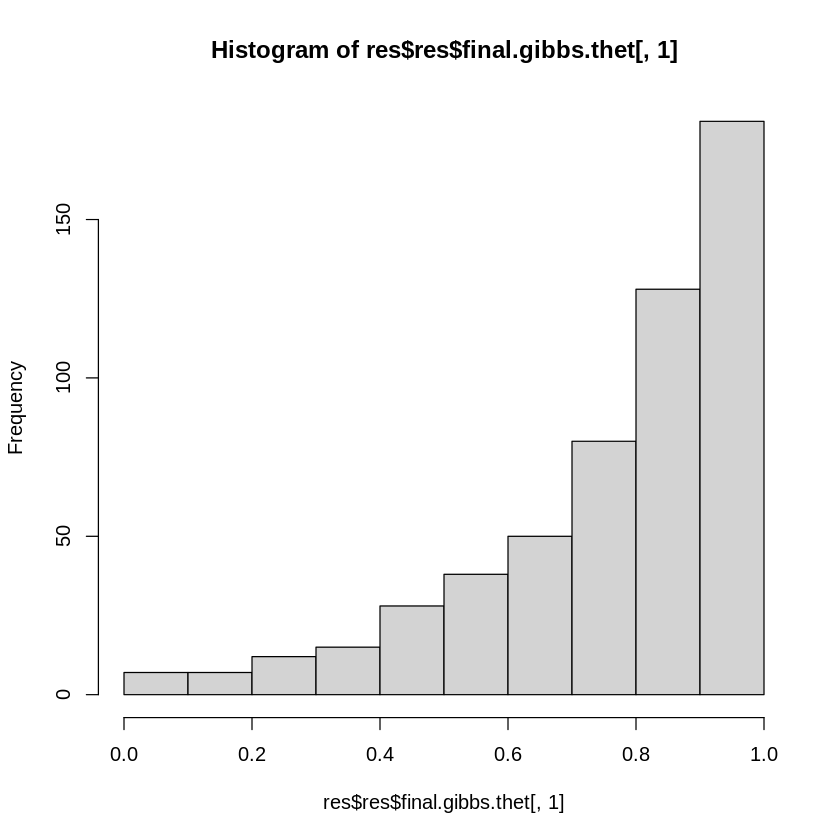

In [4]:
hist(res$res$final.gibbs.thet[,1])

In [3]:
res1$res$phi.env

,ENSG00000121410,ENSG00000268895,ENSG00000148584,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256069,ENSG00000128274,ENSG00000118017,ENSG00000094914,⋯,ENSG00000153975,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549
Fibroblast,4.790526e-07,3.048030e-06,5.382811e-08,1.240567e-03,2.094833e-06,3.366184e-05,7.236724e-09,1.393013e-04,2.281876e-07,3.339089e-05,⋯,6.564508e-06,1.760142e-05,1.410649e-05,4.544236e-06,4.750947e-05,3.636425e-06,6.375454e-05,4.416710e-04,9.048196e-05,3.904093e-05
B cell,1.655977e-06,3.033846e-06,3.499550e-08,8.575522e-06,2.838517e-07,3.172259e-05,5.312870e-09,1.333111e-08,8.352407e-09,4.948197e-05,⋯,1.283167e-05,2.093139e-05,3.263562e-05,2.451176e-05,5.335222e-05,1.418179e-05,4.343860e-05,6.161845e-05,7.989676e-05,2.023588e-05
myocyte,1.071422e-09,2.065976e-09,2.715623e-09,1.057379e-03,7.556871e-09,5.537073e-06,1.350077e-08,5.086130e-05,6.752496e-09,7.624092e-05,⋯,1.688090e-06,1.007480e-05,1.787889e-06,5.928562e-09,5.594272e-05,2.477242e-06,4.152031e-05,1.598354e-04,1.092872e-04,2.347115e-05
,1.844932e-07,9.019386e-07,7.031525e-08,3.637507e-04,8.086174e-07,2.698824e-04,1.070870e-08,8.383799e-05,6.920277e-09,2.908657e-05,⋯,8.870377e-06,1.686399e-05,1.544228e-05,1.870010e-05,6.114980e-05,8.260690e-06,6.257270e-05,1.990281e-04,6.867232e-05,2.681214e-05
Macrophage,3.298288e-07,1.411043e-06,9.989069e-09,7.210862e-04,1.376798e-06,1.566517e-05,6.532266e-09,1.496544e-08,1.015744e-08,4.821042e-05,⋯,1.604892e-05,1.957888e-05,2.943255e-05,5.904993e-05,4.087582e-05,2.106199e-06,3.832560e-05,5.589237e-04,4.206303e-05,2.676705e-05
Endothelial,1.282867e-07,9.413568e-07,6.884161e-08,1.450910e-03,4.211413e-06,3.825659e-05,4.536466e-06,1.515922e-04,9.501013e-09,2.822296e-05,⋯,1.327456e-05,1.881648e-05,2.625536e-05,1.812981e-05,5.772141e-05,7.044692e-06,6.718225e-05,3.190477e-04,1.009169e-04,3.883224e-05
T cell,3.851666e-07,1.088591e-06,1.762161e-07,3.269938e-05,1.162382e-06,8.054513e-05,6.696823e-07,1.499636e-06,2.875079e-07,1.771516e-05,⋯,1.541649e-05,1.309156e-05,3.134094e-05,4.300053e-05,9.319480e-05,2.503748e-05,6.932394e-05,2.367922e-04,1.188224e-04,4.305001e-05
Dendritic,9.554070e-07,6.553169e-08,9.309546e-08,3.239208e-05,1.002456e-07,2.712358e-05,4.277995e-09,1.690812e-08,8.519275e-09,6.941841e-06,⋯,3.615964e-05,1.543686e-05,4.610866e-05,1.262511e-05,4.199085e-05,2.104540e-05,3.008003e-05,3.829456e-04,9.742747e-05,6.903309e-05
Mast,7.083485e-07,4.897996e-06,5.085302e-07,1.455733e-04,5.888258e-06,9.364647e-05,9.013286e-06,6.846619e-06,9.594516e-09,1.842756e-05,⋯,1.354589e-05,6.861964e-06,2.406780e-05,1.090380e-05,8.286390e-05,8.903383e-06,5.111216e-05,9.390497e-05,5.997305e-05,3.087020e-05


### Learning embeddings of tumor expression. Preferred in article. Choose optimum K using NMF. Initialize using the embedding provided by user.

optimized the number of malignant bases from two to 12, and chose the number of gene programs (K) that yielded the best cophenetic score before a significant drop began. (K=4 for HNSCC)

In [11]:
install.packages("NMF")

also installing the dependencies ‘pkgmaker’, ‘registry’, ‘rngtools’, ‘gridBase’, ‘doParallel’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [13]:
install.extras('NMF')

also installing the dependency ‘bigmemory.sri’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: bigmemory

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: synchronicity


Attaching package: ‘synchronicity’


The following object is masked from ‘package:bigmemory’:

    shared.name


The following object is masked from ‘package:Biobase’:

    description




In [14]:
library(NMF)

In [15]:
Z.tum.norm <- t(res1$res$first.gibbs.res$Zkg.tum.norm)
estim.Z.tum.norm <- nmf(Z.tum.norm, 2:12, nrun=30, seed=123456)

Timing stopped at: 24.11 20.69 44.19



In [19]:
resK4 <- nmf(Z.tum.norm,4,nrun=200,.opt='vp50',seed=123456)
phi.tumK4 <- t(basis(resK4))

NMF algorithm: 'brunet'

Multiple runs: 200

Mode: parallel (32/32 core(s))



Runs: |                                                  |   0%

Timing stopped at: 1.693 14.14 987.3



In [ ]:
res1.k4 <- learn.embedding.withPhiTum(ted.res=res1, phi.tum=phi.tumK4,
                                     EM.maxit=50, n.cores=20, compute.posterior=T)

# pathway initialized using hierarchical clustering 